- [Data wrangling](#Data wrangling)
- [Data Visualization](#Data Visualization)
- [More Data Wrangling](#More Data Wrangling)
- [Merging Data](#Merging Data)
- [Evaluation Metric](#Evaluation Metric)
- [Modeling](#Modeling)

In [4]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from langdetect import detect
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import random
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [2]:
df_train = pd.read_csv('train 2.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [4]:
df_test.head()

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?


In [5]:
df = pd.concat([df_train, df_test], axis=0, ignore_index=True)

/Users/arielyeung/anaconda2/envs/py365/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [6]:
df.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0.0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0.0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0.0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0.0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0.0


<a id='Data wrangling'></a>

# Data wrangling

In [7]:
df['test'] = df['target'].isnull() * 1

In [10]:
mispell_dict = {"aren't" : "are not", "can't" : "cannot", "couldn't" : "could not", "didn't" : "did not",
                "doesn't" : "does not", "don't" : "do not", "hadn't" : "had not", "hasn't" : "has not",
                "haven't" : "have not", "he'd" : "he would", "he'll" : "he will", "he's" : "he is",
                "i'd" : "I would", "i'd" : "I had", "i'll" : "I will", "i'm" : "I am", "isn't" : "is not",
                "it's" : "it is", "it'll":"it will", "i've" : "I have", "let's" : "let us",
                "mightn't" : "might not", "mustn't" : "must not", "shan't" : "shall not", "she'd" : "she would",
                "she'll" : "she will", "she's" : "she is", "shouldn't" : "should not", "that's" : "that is",
                "there's" : "there is", "they'd" : "they would", "they'll" : "they will", "they're" : "they are",
                "they've" : "they have", "we'd" : "we would", "we're" : "we are", "weren't" : "were not",
                "we've" : "we have", "what'll" : "what will", "what're" : "what are", "what's" : "what is",
                "what've" : "what have", "where's" : "where is", "who'd" : "who would", "who'll" : "who will",
                "who're" : "who are", "who's" : "who is", "who've" : "who have", "won't" : "will not",
                "wouldn't" : "would not", "you'd" : "you would", "you'll" : "you will", "you're" : "you are",
                "you've" : "you have", "'re": " are", "wasn't": "was not", "we'll":" will", "didn't": "did not",
                "tryin'":"trying"}

In [13]:
def _get_mispell(mispell_dict):
    mispell_re = re.compile('(%s)' % '|'.join(mispell_dict.keys()))
    return mispell_dict, mispell_re

mispellings, mispellings_re = _get_mispell(mispell_dict)

def replace_typical_misspell(text):
    def replace(match):
        return mispellings[match.group(0)]
    
    text = mispellings_re.sub(replace, text)
    return text

In [14]:
df['cleaned_text'] = df['question_text'].map(replace_typical_misspell)

In [15]:
stoplist = set(stopwords.words('english'))

In [16]:
lemmatizer = WordNetLemmatizer()

In [17]:
def cleantext(x):
    x = x.lower()
    x = x.translate(str.maketrans('','',string.punctuation))
    x = ' '.join([word for word in x.split() if word not in (stoplist)])
    x = ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
    return x

In [18]:
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: cleantext(x))

In [19]:
df.head()

,qid,question_text,target,test,cleaned_text
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0.0,0,quebec nationalist see province nation 1960s
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0.0,0,adopted dog would encourage people adopt shop
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0.0,0,velocity affect time velocity affect space geo...
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0.0,0,otto von guericke used magdeburg hemisphere
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0.0,0,convert montra helicon mountain bike changing ...


In [48]:
df.isnull().sum()

qid                   0
question_text         0
target           375806
test                  0
cleaned_text        111
length                0
lang                  3
dtype: int64

In [13]:
df['cleaned_text'] = df['cleaned_text'].fillna('na')

In [51]:
df.isnull().sum()

qid                   0
question_text         0
target           375806
test                  0
cleaned_text          0
length                0
lang                  3
dtype: int64

<a id='Data Visualization'></a>

# Data Visualization

In [144]:
df['length'] = df['question_text'].apply(lambda x: len(x.split(' ')))

In [145]:
df['length'].mean()

12.80513256215486

/Users/arielyeung/anaconda2/envs/py365/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



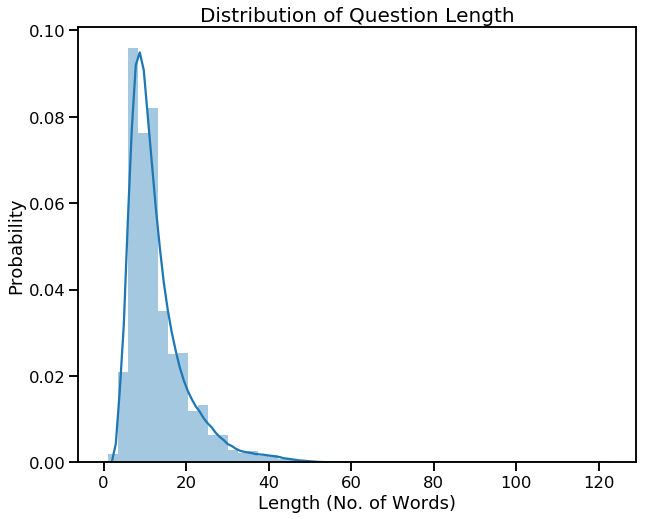

In [6]:
sns.set_context('talk')
plt.figure(figsize=(10, 8))
sns.distplot(df['length'])
plt.xlabel('Length (No. of Words)')
plt.ylabel('Probability')
plt.title('Distribution of Question Length', fontsize=20);

In [191]:
def detect_lang(x):
    try:
        result = detect(x)
    except:
        result = np.nan
    return result

In [192]:
df['lang'] = df['question_text'].apply(lambda x: detect_lang(x))

In [193]:
df.to_csv('data.csv', index=False)

In [2]:
df = pd.read_csv('data.csv')

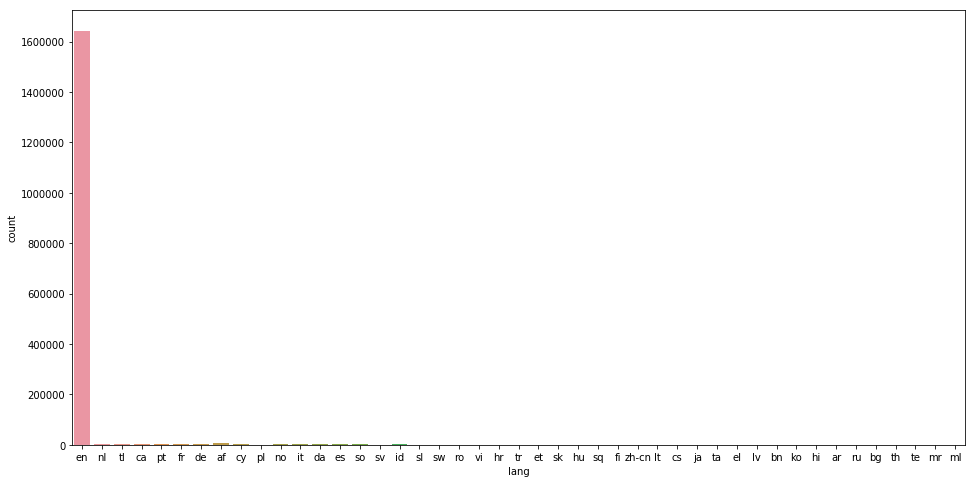

In [198]:
plt.figure(figsize=(16,8))
sns.countplot(x='lang', data=df)

In [5]:
temp = df['lang'].value_counts()
trace = go.Bar(x=temp.index, y=temp, marker=dict(color='coral'), opacity=0.6)
data = [trace]
layout = go.Layout(title='Distribution of Language', titlefont=dict(size=22),
                   xaxis=dict(title='Language',
                              titlefont=dict(size=16),
                              tickfont=dict(size=12)),
                   yaxis=dict(title='Count',
                              titlefont=dict(size=16),
                              tickfont=dict(size=14)))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,qid,question_text,target,test,cleaned_text,length,lang
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0.0,0,quebec nationalist see province nation 1960s,13,en
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0.0,0,adopted dog would encourage people adopt shop,16,en
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0.0,0,velocity affect time velocity affect space geo...,10,en
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0.0,0,otto von guericke used magdeburg hemisphere,9,en
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0.0,0,convert montra helicon mountain bike changing ...,15,en


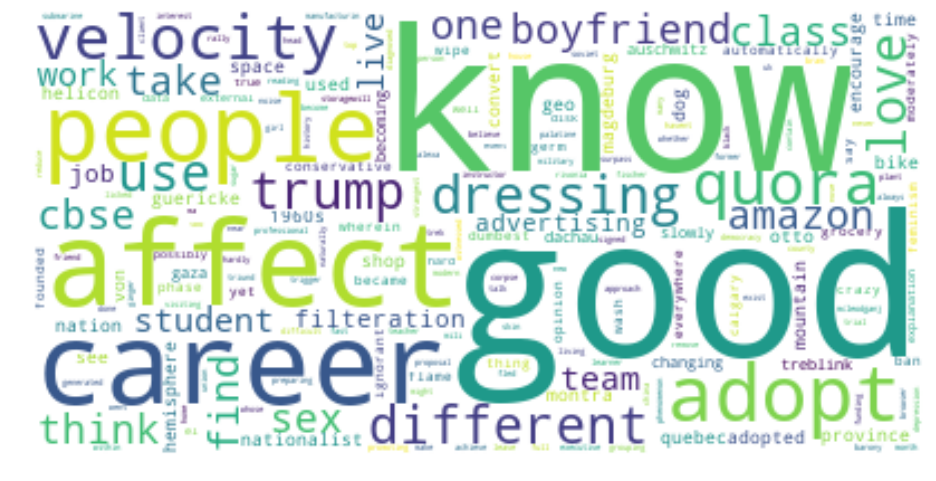

In [22]:
wordcloud = WordCloud(background_color='white').generate(str(df[df['target'] == 0]['cleaned_text']))
plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

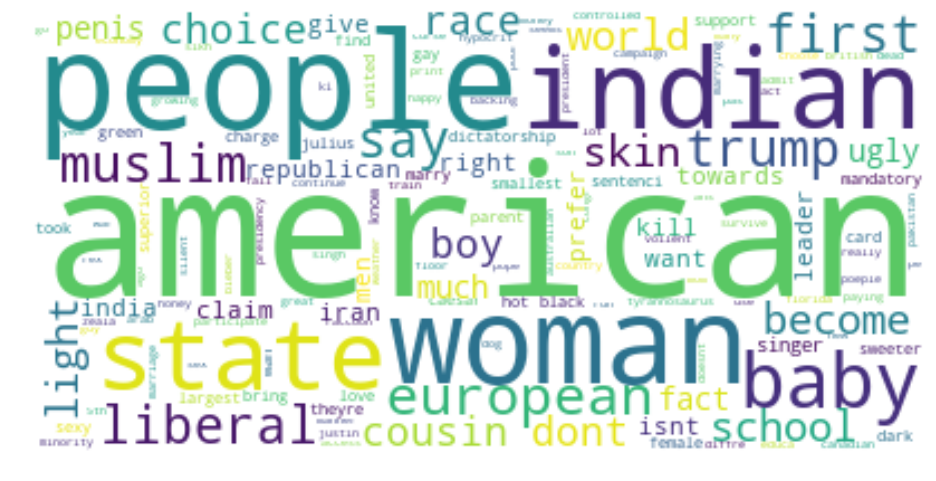

In [23]:
wordcloud = WordCloud(background_color='white').generate(str(df[df['target'] == 1]['cleaned_text']))
plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<a id='Modeling'></a>

# Modeling

In [4]:
##X = df[df['test'] == 0]['cleaned_text']
##Y = df[df['test'] == 0]['target']
##X_submit = df[df['test'] == 1]['cleaned_text']

In [60]:
final_df = df[df['test'] == 0]
random.seed(6)
#final_df = final_df.take(np.random.permutation(len(final_df))[:500000])

In [61]:
final_df.shape

(1306122, 7)

In [62]:
X = final_df['cleaned_text']
Y = final_df['target']

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=6, stratify=Y)

In [65]:
X_train.shape

(914285,)

## TF

In [159]:
count_vectorizer = CountVectorizer(stop_words="english")
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [160]:
nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [162]:
Y_pred = nb_classifier.predict(count_test)

In [166]:
f1_score(Y_test, Y_pred)

0.539015691868759

## TF-IDF

In [175]:
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [176]:
rf_classifier = RandomForestClassifier(n_estimators=200)
rf_classifier.fit(tfidf_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [177]:
Y_pred = rf_classifier.predict(tfidf_test)

In [178]:
f1_score(Y_test, Y_pred)

0.24761904761904763

## Word Embedding

In [11]:
from keras.preprocessing import text, sequence

Using TensorFlow backend.


In [66]:
maxlen = 50
max_features = 50000
embed_size = 300

tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train) + list(X_test))

In [67]:
X_train2 = tokenizer.texts_to_sequences(X_train)
X_test2 = tokenizer.texts_to_sequences(X_test)

X_train3 = sequence.pad_sequences(X_train2, maxlen=maxlen)
X_test3 = sequence.pad_sequences(X_test2, maxlen=maxlen)

### Glove

In [24]:
embed_glove = {}
f = open('embeddings/glove.840B.300d/glove.840B.300d.txt')
for line in f:
    values = line.split(' ')
    word = values[0]
    coefs = np.array(values[1:], dtype='float32')
    embed_glove[word] = coefs
f.close()

In [87]:
##all_glove = np.stack(embed_glove.values())
##glove_mean, glove_std = all_glove.mean(), all_glove.std()
##embed_size = all_glove.shape[1]

In [68]:
word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embed_matrix_glove = np.zeros((nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features:
        continue
    embedding_vector = embed_glove.get(word)
    if embedding_vector is not None: embed_matrix_glove[i] = embedding_vector

### Paragram

In [26]:
embed_para = {}
f = open('embeddings/paragram_300_sl999/paragram_300_sl999.txt', encoding='utf8', errors='ignore')
for line in f:
    values = line.split(' ')
    word = values[0]
    coefs = np.array(values[1:], dtype='float32')
    embed_para[word] = coefs
f.close()

In [89]:
##all_para = np.stack(embed_para.values())
##para_mean, para_std = all_para.mean(), all_para.std()
##embed_size = all_para.shape[1]

In [69]:
word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embed_matrix_para = np.zeros((nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: 
        continue
    embedding_vector = embed_para.get(word)
    if embedding_vector is not None: embed_matrix_para[i] = embedding_vector

In [70]:
embedding_matrix = np.concatenate((embed_matrix_glove, embed_matrix_para), axis=1)  
np.shape(embedding_matrix)

(50000, 600)

In [29]:
from keras import backend as K

In [30]:
def f1_threshold(threshold=0.2):
    def f1(y_true, y_pred):
        threshold_ = threshold
        def recall_threshold(threshold=threshold):
            def recall(y_true, y_pred):
                threshold_value = threshold
                # Adaptation of the "round()" used before to get the predictions. Clipping to make sure that the predicted raw values are between 0 and 1.
                y_pred = K.cast(K.greater(K.clip(y_pred, 0, 1), threshold_value), K.floatx())
                # Compute the number of true positives. Rounding in prevention to make sure we have an integer.
                true_positives = K.round(K.sum(K.clip(y_true * y_pred, 0, 1)))
                # Compute the number of positive targets.
                possible_positives = K.sum(K.clip(y_true, 0, 1))
                recall_ratio = true_positives / (possible_positives + K.epsilon())
                return recall_ratio
            recall = recall(y_true, y_pred)
            return recall
        def precision_threshold(threshold=threshold):
            def precision(y_true, y_pred):
                threshold_value = threshold
                # Adaptation of the "round()" used before to get the predictions. Clipping to make sure that the predicted raw values are between 0 and 1.
                y_pred = K.cast(K.greater(K.clip(y_pred, 0, 1), threshold_value), K.floatx())
                # Compute the number of true positives. Rounding in prevention to make sure we have an integer.
                true_positives = K.round(K.sum(K.clip(y_true * y_pred, 0, 1)))
                # count the predicted positives
                predicted_positives = K.sum(y_pred)
                # Get the precision ratio
                precision_ratio = true_positives / (predicted_positives + K.epsilon())
                return precision_ratio
            precision = precision(y_true, y_pred)
            return precision

        precision = precision_threshold(threshold_)
        recall = recall_threshold(threshold_)
        return 2*((precision * recall) / (precision + recall + K.epsilon()))
    return f1

### CNN

In [35]:
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, MaxPool1D, GlobalAveragePooling1D, Dense, Flatten, Embedding, Dropout, Concatenate, SpatialDropout1D, Input
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1) 

In [71]:
def model1():
    inp = Input(shape=(maxlen, ))
    embed = Embedding(max_features, embed_size * 2, weights=[embedding_matrix], trainable=False)(inp)
    
     #x = Reshape((maxlen, embed_size * 4, 1))(embed)
    
    filter_sizes = [1,2,3,5]
    num_filters = 64
    
    conv_0 = Conv1D(num_filters, filter_sizes[0], padding='valid', kernel_initializer='normal', activation='relu')(embed)
    conv_1 = Conv1D(num_filters, filter_sizes[1], padding='valid', kernel_initializer='normal', activation='relu')(embed)
    conv_2 = Conv1D(num_filters, filter_sizes[2], padding='valid', kernel_initializer='normal', activation='relu')(embed)
    conv_3 = Conv1D(num_filters, filter_sizes[3], padding='valid', kernel_initializer='normal', activation='relu')(embed)

    maxpool_0 = MaxPool1D(pool_size=(maxlen - filter_sizes[0] + 1), strides=(1), padding='valid')(conv_0)
    maxpool_1 = MaxPool1D(pool_size=(maxlen - filter_sizes[1] + 1), strides=(1), padding='valid')(conv_1)
    maxpool_2 = MaxPool1D(pool_size=(maxlen - filter_sizes[2] + 1), strides=(1), padding='valid')(conv_2)
    maxpool_3 = MaxPool1D(pool_size=(maxlen - filter_sizes[3] + 1), strides=(1), padding='valid')(conv_3)

    concatenated_tensor = Concatenate(axis=1)([maxpool_0, maxpool_1, maxpool_2, maxpool_3])
    
    flatten = Flatten()(concatenated_tensor)
    
    x = flatten
    x = Dropout(0.3)(x)
    x = Dense(128, activation='relu')(x)
    outp = Dense(1, activation="sigmoid")(x)
    model = Model(inputs=inp, outputs=outp)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy', f1_threshold(threshold = 0.2), f1_threshold(threshold = 0.3), 
                           f1_threshold(threshold = 0.4), f1_threshold(threshold = 0.5)])    

    return model

In [72]:
MODEL1 = model1()
MODEL1.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 50)           0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 50, 600)      30000000    input_5[0][0]                    
__________________________________________________________________________________________________
conv1d_17 (Conv1D)              (None, 50, 64)       38464       embedding_5[0][0]                
__________________________________________________________________________________________________
conv1d_18 (Conv1D)              (None, 49, 64)       76864       embedding_5[0][0]                
__________________________________________________________________________________________________
conv1d_19 

In [ ]:
history = MODEL1.fit(X_train3, Y_train, batch_size=1000, epochs=40, verbose=1, validation_split=0.1, callbacks=[early_stop])

Train on 822856 samples, validate on 91429 samples
Epoch 1/40
822856/822856 [==============================] - 1290s 2ms/step - loss: 0.1297 - acc: 0.9491 - f1: 0.5472 - f1_1: 0.5636 - f1_2: 0.5444 - f1_3: 0.4855 - val_loss: 0.1245 - val_acc: 0.9499 - val_f1: 0.5461 - val_f1_1: 0.5850 - val_f1_2: 0.5953 - val_f1_3: 0.5833
Epoch 2/40
822856/822856 [==============================] - 1330s 2ms/step - loss: 0.1173 - acc: 0.9533 - f1: 0.5923 - f1_1: 0.6077 - f1_2: 0.5953 - f1_3: 0.5507 - val_loss: 0.1194 - val_acc: 0.9514 - val_f1: 0.5643 - val_f1_1: 0.6011 - val_f1_2: 0.6169 - val_f1_3: 0.6032
Epoch 3/40
822856/822856 [==============================] - 1334s 2ms/step - loss: 0.1109 - acc: 0.9556 - f1: 0.6133 - f1_1: 0.6308 - f1_2: 0.6212 - f1_3: 0.5825 - val_loss: 0.1157 - val_acc: 0.9532 - val_f1: 0.5786 - val_f1_1: 0.6137 - val_f1_2: 0.6248 - val_f1_3: 0.6133
Epoch 4/40
822856/822856 [==============================] - 1300s 2ms/step - loss: 0.1054 - acc: 0.9575 - f1: 0.6286 - f1_1: 0.649

In [57]:
MODEL1.save_weights('cnn_weight.h5')

In [50]:
MODEL1.metrics_names

['loss', 'acc', 'f1', 'f1_1', 'f1_2', 'f1_3']

In [52]:
score = MODEL1.evaluate(X_test3, Y_test, verbose=0)
score

[0.14831635059791082,
 0.9511030303030303,
 0.5020960950389053,
 0.49881168179078533,
 0.4852452719283826,
 0.4555499802965106]

### RNN